<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное: RM
2.   Равномерное: в явном виде не видно
3.   Биноминальное: в явном виде не видно
4.   Бернулли: CHAS
5.   Геометрическое: CRIM / B
6.   Логнормальное: AGE / DIS


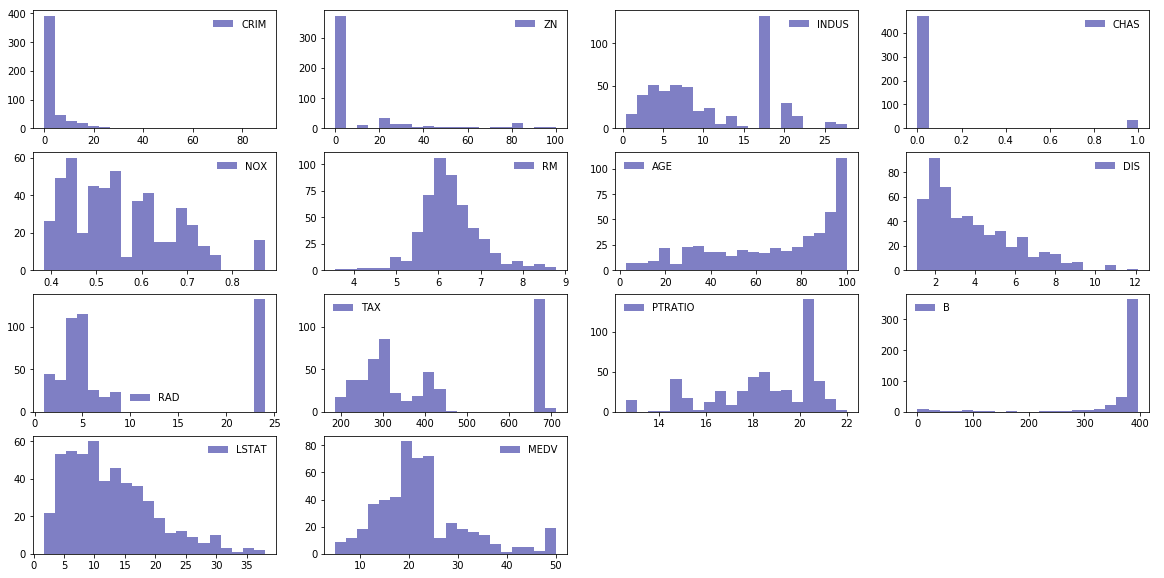

In [3]:
# сколько графиков в каждом ряду будет
ncols = 4
nrows = int(np.ceil(len(data.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

# рисуем графики
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # рисуем только когда есть дата
        if counter < len(data.columns):

            ax.hist(data[data.columns[counter]], bins=20, color='darkblue', alpha=0.5, label='{}'.format(data.columns[counter]))
            leg = ax.legend(loc='best')
            leg.draw_frame(False)

        # убрать оси, когда нет даты
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [4]:
data['MEDV'].fillna(0, inplace = True)
data['LSTAT'].fillna(0, inplace = True)

In [5]:
prices = data['MEDV']
status = data['LSTAT']

In [6]:
prices = np.array(prices).reshape(-1,1)
status = np.array(status).reshape(-1,1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    prices,
    status,
    test_size = 0.2,
    random_state = 3
)

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
predicted_y = model.predict(X_test)

In [11]:
model.score(X_test, y_test)

0.5663680841829949

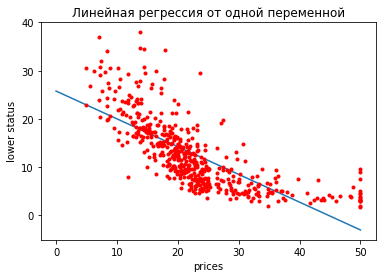

In [12]:
plt.xlabel('prices')
plt.ylabel('lower status')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 50, 5)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(prices, status, 'r.')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [13]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [14]:
numbers = data.iloc[:,1:].fillna(0)

In [15]:
np.round_(np.cov(numbers.T), decimals=2)

array([[2041.  , 1100.84, 1014.41, 1079.27, 1671.65, 1125.85,  438.73,
        1027.35, 1555.55, 1558.22],
       [1100.84, 2041.  ,  168.8 , 1247.9 , 1207.88,  505.28,  481.7 ,
         788.86, 1237.45, 1183.18],
       [1014.41,  168.8 , 2041.  ,  819.17,  812.31, 1403.9 ,  447.82,
         749.46,  601.24,  622.31],
       [1079.27, 1247.9 ,  819.17, 2041.  , 1284.02,  900.34,  345.18,
         716.13, 1077.88,  987.86],
       [1671.65, 1207.88,  812.31, 1284.02, 2041.  ,  937.7 ,  292.85,
         924.75, 1439.99, 1416.92],
       [1125.85,  505.28, 1403.9 ,  900.34,  937.7 , 2041.  ,  830.45,
        1019.96,  795.21,  763.04],
       [ 438.73,  481.7 ,  447.82,  345.18,  292.85,  830.45, 2014.59,
         568.57,  581.92,  293.5 ],
       [1027.35,  788.86,  749.46,  716.13,  924.75, 1019.96,  568.57,
        2041.  ,  979.26,  827.15],
       [1555.55, 1237.45,  601.24, 1077.88, 1439.99,  795.21,  581.92,
         979.26, 2035.14, 1540.28],
       [1558.22, 1183.18,  622.31,  9

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [16]:
print("Кол-во отсутствующих значений в таблице: ", sum(data.isna().sum()))

Кол-во отсутствующих значений в таблице:  23


In [17]:
data = data.dropna(axis=0)

Сколько стран в выборке? Написать ответ. 

In [18]:
print('Кол-во стран в выборке: ', len(data))

Кол-во стран в выборке:  140


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [19]:
continents = pd.read_csv('Desktop/continents.csv', sep = ';')
continents.head()

,country,continent
0,Mauritius,Africa
1,Libya,Africa
2,Nigeria,Africa
3,Algeria,Africa
4,Morocco,Africa


In [20]:
data.rename(columns={"Country (region)": "country"}, inplace = True)

In [21]:
data = data.merge(continents, on = 'country')
data.head()

,country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Euroasia
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Euroasia
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Euroasia
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Euroasia
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Euroasia


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

Взял только часть таблицы, иначе график получается слишком большим, тяжелым для прочтения

Вывод: Евразия и Австралия похожи

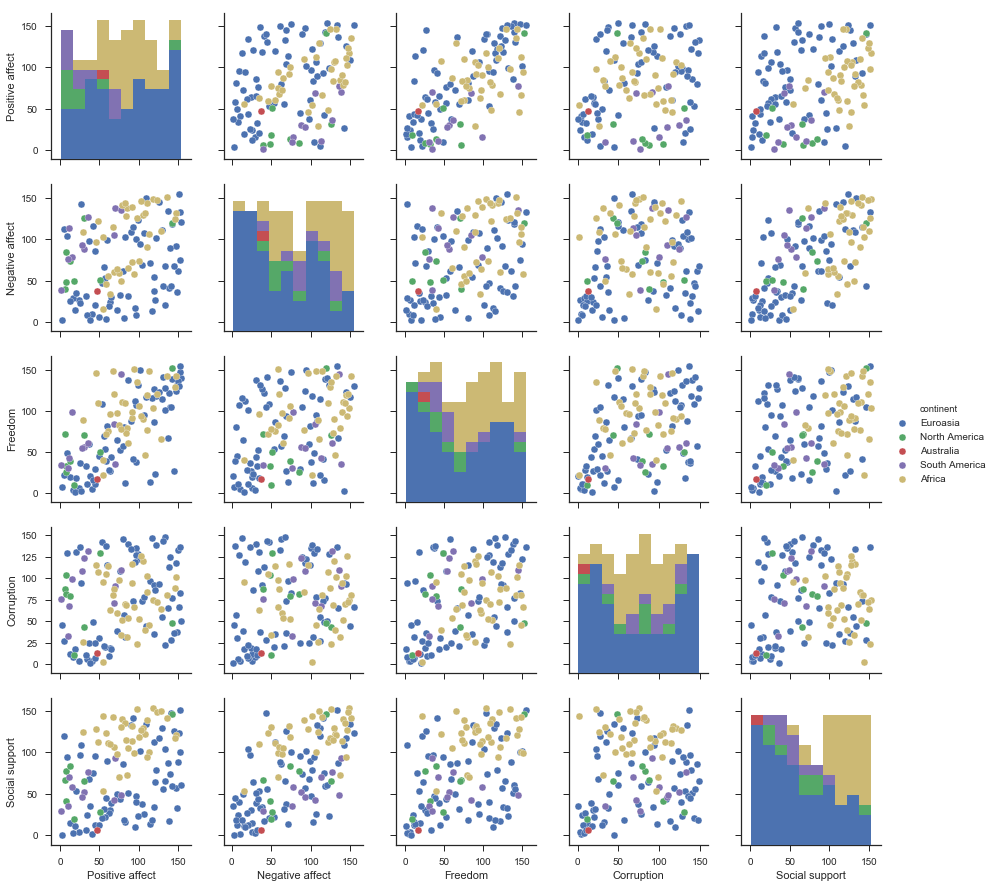

In [22]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data[['Positive affect', 'Negative affect', 'Freedom', 'Corruption', 'Social support', 'continent']], hue='continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

- коррупция почти никак не коррелирует с остальными переменными => возможно и не влияет на индекс счастья
- уровень богатства имеет высокую линейную взаимосвязь с удов. жизнью (Ladder): богаче стране = счастливее страна
- то же самое можно сказать и про social support

Корреляционная матрица, посчитанная для исходной таблицы:


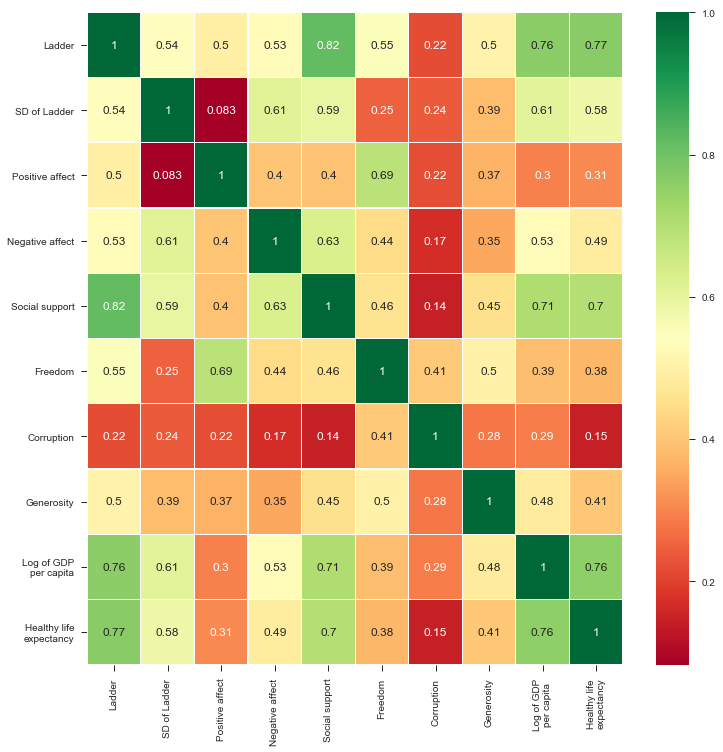

In [23]:
import seaborn as sns
print('Корреляционная матрица, посчитанная для исходной таблицы:')
sns.heatmap(numbers.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

Собственное значение:  3005.98 Собственный вектор:  [0.71131033 0.70287809]


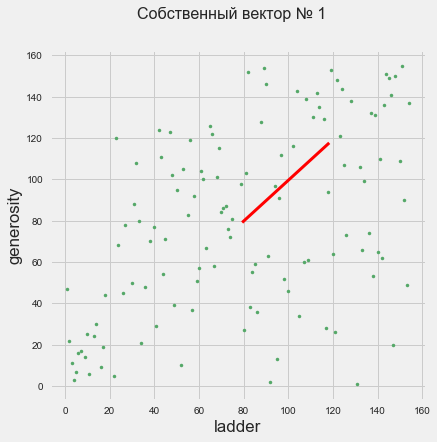

Собственное значение:  1025.58 Собственный вектор:  [-0.70287809  0.71131033]


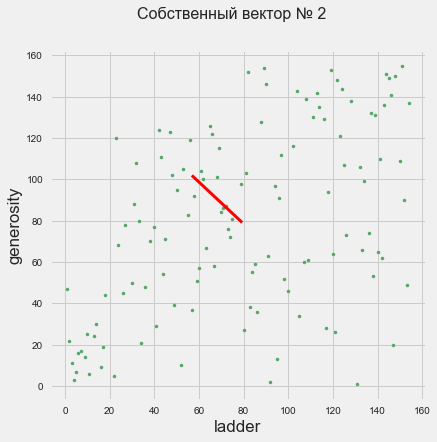

In [51]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

ladder = data['Ladder'].dropna()
generosity = data['Generosity'].dropna()

Y = np.vstack((ladder, generosity)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(ladder, generosity, 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('ladder')
    plt.ylabel('generosity')
    plt.plot([ladder.mean(), ladder.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [generosity.mean(), generosity.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [24]:
import random

dice = []

for i in range(0,10):
    rolled_num = random.randint(1,6)
    dice.append(rolled_num)

График 10 подбрасываний игрального кубика: распределение Бернулли


(array([1., 0., 4., 0., 0., 1., 0., 1., 0., 3.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

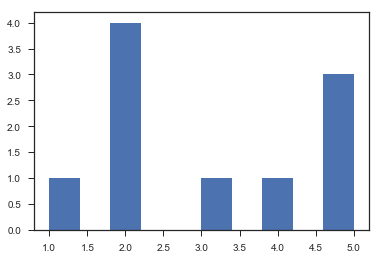

In [28]:
print('График 10 подбрасываний игрального кубика: распределение Бернулли')
plt.hist(dice)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему? 

- применяем ЦПТ т.к. кол-во подбрасываний достаточно велико

In [31]:
dice_1000 = []

for i in range(0,1000):
    rolled_num = random.randint(1,6)
    dice_1000.append(rolled_num)

График 1000 подбрасываний игрального кубика: равномерное распределение


(array([178.,   0., 158.,   0., 174.,   0., 182.,   0., 140., 168.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

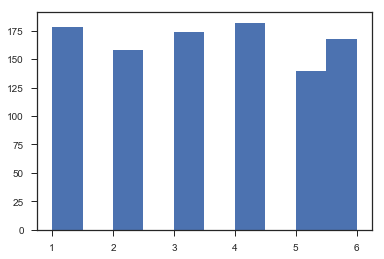

In [33]:
print('График 1000 подбрасываний игрального кубика: равномерное распределение')
plt.hist(dice_1000)